![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Session 4: Pandas and SQLite in depth session

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-10-29)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/Session_4/04_Pandas_&_SQLite_recap_through_exercises.ipynb)


# More Pandas!

Check a good cheatsheet for Pandas [here](https://www.w3resource.com/python-exercises/pandas/index.php)

[Some cool exercise resources for Pandas](https://www.machinelearningplus.com/python/101-pandas-exercises-python/)

## Groupby exersises

Import this [dataset](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)

*   What is the mean age per occupation?
*   What is the male ratio per occupation, sort it from the most to the least. Do the same for women
*   For each occupation, calculate the minimum and maximum ages
* For each combination of occupation and gender, calculate the mean age
* For each occupation present the percentage of women and men



In [1]:
import pandas as pd

In [377]:
data = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|', index_col='user_id')
data.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [393]:
# What is the mean age per occupation?

# First way
data.groupby(by='occupation').mean()

# Second
#gru1 = data.groupby(['occupation'])
#gru1['age'].mean()


,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [ ]:
# What is the male ratio per occupation, sort it from the most to the least. Do the same for women

In [416]:
dm = data[data['gender'] == 'M'].groupby(by='occupation').count()
df = data[data['gender'] == 'F'].groupby(by='occupation').count()

d_conca = pd.concat([dm['gender'],df['gender']] , axis=1 )
d_conca.columns = ['M','F']
d_conca = d_conca.fillna(0)

d_conca['Male_ratio'] = d_conca['M'] / (d_conca['M']+d_conca['F'])
d_conca['Female_ratio'] = d_conca['F'] / (d_conca['M']+d_conca['F'])

d_conca.sort_values(by='Male_ratio', ascending=False)

,M,F,Male_ratio,Female_ratio
doctor,7,0.0,1.000000,0.000000
engineer,65,2.0,0.970149,0.029851
technician,26,1.0,0.962963,0.037037
retired,13,1.0,0.928571,0.071429
programmer,60,6.0,0.909091,0.090909
executive,29,3.0,0.906250,0.093750
scientist,28,3.0,0.903226,0.096774
entertainment,16,2.0,0.888889,0.111111
lawyer,10,2.0,0.833333,0.166667
salesman,9,3.0,0.750000,0.250000


In [388]:
# Do the same for women
d_conca.sort_values(by='Female_ratio', ascending=False)

,M,F,Male_ratio,Female_ratio
homemaker,1,6.0,0.142857,0.857143
healthcare,5,11.0,0.312500,0.687500
librarian,22,29.0,0.431373,0.568627
artist,15,13.0,0.535714,0.464286
administrator,43,36.0,0.544304,0.455696
none,5,4.0,0.555556,0.444444
writer,26,19.0,0.577778,0.422222
marketing,16,10.0,0.615385,0.384615
other,69,36.0,0.657143,0.342857
student,136,60.0,0.693878,0.306122


In [ ]:
# For each occupation, calculate the minimum and maximum ages

In [391]:
# First way
data.groupby([by='occupation']).max()
data.groupby([by='occupation']).min()

# Second
#gru = data.groupby(['occupation'])
#gru['age'].min()
#gru['age'].max()

,age,gender,zip_code
occupation,,,
administrator,21,F,02154
artist,19,F,01945
doctor,28,M,47401
educator,23,F,01602
engineer,22,F,00000
entertainment,15,F,01040
executive,22,F,00000
healthcare,22,F,02154
homemaker,20,F,17331


In [ ]:
# For each combination of occupation and gender, calculate the mean age

In [395]:
# First way
data.groupby( by= ['occupation' , 'gender']).mean('age')

# Second
#gru = data.groupby(['occupation', 'gender'])
#gru['age'].mean()

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [117]:
# For each occupation present the percentage of women and men

In [419]:
dm_per = d_conca['Male_ratio']*100
df_per = d_conca['Female_ratio']*100
d_per = pd.concat([dm_per,df_per] , axis=1 )
d_per.columns = ['M_per','F_per']
d_per

,M_per,F_per
administrator,54.430380,45.569620
artist,53.571429,46.428571
doctor,100.000000,0.000000
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286
lawyer,83.333333,16.666667


## Apply exercises

Import this [dataset](https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv)

* What is the type of the columns?
* Convert the type of the column Year to datetime64
* Set the Year column as the index of the dataframe
* Delete the Total column
* Group the year by decades and sum the values (take care with population values)
* What is the most dangerous decade to live in the US?


In [688]:
import pandas as pd
from datetime import datetime

url = "https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv"
#data = pd.read_csv(url, parse_dates=['Year'])
data = pd.read_csv(url)

In [633]:
data.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [634]:
# What is the type of the columns?

In [635]:
type(data)

pandas.core.frame.DataFrame

In [636]:
type(data['Year'])

pandas.core.series.Series

In [637]:
type(data['Year'][1])

numpy.int64

In [638]:
# Convert the type of the column Year to datetime64

In [639]:
data['Year']= pd.to_datetime(data['Year'], format='%Y')
#data.set_index('Year',inplace=True)
data.head(5)

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [643]:
type(data.Year[0])

pandas._libs.tslibs.timestamps.Timestamp

In [645]:
type(data['Year'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [704]:
# convert from Timestamp to numpy.int
to_numpy = []
for i in data['Year']:
    x = str(i)
    #print(x[:4])
    to_numpy.append(int(x[:4])) 
data['Year'] = to_numpy

In [705]:
type(data['Year'][0])

numpy.int64

In [574]:
# Delete the Total column

In [694]:
del data['Total']
data.head()

#data = data.set_index('Year', drop = True)

,Year,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [708]:
#Group the year by decades and sum the values (take care with population values)
decades_df= df.groupby((data.Year//10)*10).sum()
decades

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,1915053175,49295900,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,2121193298,100991600,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,2371370069,131123369,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,2612825258,136582146,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,2947969117,115012044,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,1570146307,50167967,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [710]:
#What is the most dangerous decade to live in the US?
dangerousrate= decades['Total']/decades['Population']
dangerousrate.sort_values(ascending=False)

Year
1980    0.055294
1990    0.052274
1970    0.047611
2000    0.039014
2010    0.031951
1960    0.025741
dtype: float64

# SQLite and Pandas

## SQLite, Pandas and the world of tips

Given [this](https://github.com/vfp1/bts-dsf-2020/blob/main/data/tips.csv) CSV file. Do the following:

* Load it in Pandas
* Save the `DataFrame` as SQLite
* Reply the following questions by slicing the SQLite database with SQL queries and then using Pandas for analysis:
    * Who is most likely to receive a tip during weekday? A Female or a Male? 
        * And during weekends?
    * What is the table size that is most likely to bring a better tip?
    * Who are giving more tips, smokers or non smokers? 

In [711]:
import pandas as pd
import numpy as np
import sqlite3

In [712]:
url = 'https://github.com/vfp1/bts-dsf-2020/raw/main/data/tips.csv'
tips = pd.read_csv(url,error_bad_lines=False)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [714]:
cnx = sqlite3.connect('tips.db')
tips.to_sql(name='tips', con=cnx)

In [715]:
def create_connect_database(db_name):
    """Opens connection or creates it if it is not existent"""
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    
    return connection, cursor

def commit_close(conn, c, close_connection=True):
    """Commits to connection DB and closes it if close is True"""
    conn.commit()
    
    if close_connection is True:
        c.close()
        conn.close()
    elif close_connection is False:
        pass


In [725]:
connection, cursor = create_connect_database('tips.db')

In [726]:
query = """SELECT day, sex, COUNT(*) FROM tips GROUP BY day, sex;"""

In [727]:
pd.read_sql(sql=query, con=connection)

,day,sex,COUNT(*)
0,Fri,Female,9
1,Fri,Male,10
2,Sat,Female,28
3,Sat,Male,59
4,Sun,Female,18
5,Sun,Male,58
6,Thur,Female,32
7,Thur,Male,30


In [718]:
query = '''SELECT sex,CASE WHEN (day != 'Sat') and (day != 'Sun') \
THEN 'weekday' ELSE 'weekend' END AS weekday_weekend,count(tip) \
FROM tips GROUP BY sex ,CASE WHEN (day != 'Sat') and (day != 'Sun') \
THEN 'weekday' ELSE 'weekend' END '''

In [728]:
pd.read_sql(sql=query, con=connection)

,day,sex,COUNT(*)
0,Fri,Female,9
1,Fri,Male,10
2,Sat,Female,28
3,Sat,Male,59
4,Sun,Female,18
5,Sun,Male,58
6,Thur,Female,32
7,Thur,Male,30


In [720]:
query = '''SELECT size, AVG(tip), COUNT(*) FROM tips GROUP BY size;'''

In [729]:
pd.read_sql(sql=query, con=connection)

,day,sex,COUNT(*)
0,Fri,Female,9
1,Fri,Male,10
2,Sat,Female,28
3,Sat,Male,59
4,Sun,Female,18
5,Sun,Male,58
6,Thur,Female,32
7,Thur,Male,30


In [722]:
query = """SELECT smoker, AVG(tip) From tips GROUP BY smoker"""

In [730]:
pd.read_sql(sql=query, con=connection)

,day,sex,COUNT(*)
0,Fri,Female,9
1,Fri,Male,10
2,Sat,Female,28
3,Sat,Male,59
4,Sun,Female,18
5,Sun,Male,58
6,Thur,Female,32
7,Thur,Male,30


## More airports, this time without spatial fears
 

Download [this Sqlite database](https://github.com/vfp1/bts-dsf-2020/raw/main/data/flights.db)

Using SQLite database reply the following questions:

*   Which is the country that has the least amount of active airlines?
*   And which is the country that has the most amount of active airlines?
*   Which is the country that has more airports?
*   And the country with the least airports?
*   Which country has the most outgoing destinations? And the least?
*   And which country has the most incoming destinations? And the least?



In [737]:
import pandas as pd
import geopandas as gpd
import sqlite3
import matplotlib.pyplot as plt

In [738]:
def create_coonect_database(db_name):
    '''Opens connection or creates it if it is not existent'''
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    return connection, cursor

def commit_close(conn, c, close_connection=True):
    '''Commits to connection DB and closes it if close it True'''
    conn.commit()
    
    if close_connection is True:
        c.close()
        conn.close()


In [739]:
connection, cursor = create_connect_database('flights.db')

In [740]:
# Which is the country that has the least amount of active airlines?

In [789]:
airlines = "SELECT country, active FROM airlines WHERE airlines.active = 'Y';"
result = pd.read_sql(sql=airlines, con=connection)

In [790]:
#result["country"].value_counts(normalize=False)
result['country'].value_counts(normalize=False).sort_values(ascending=True)

Aruba               1
Cook Islands        1
Botswana            1
Bahrain             1
Puerto Rico         1
                 ... 
Canada             34
Germany            37
United Kingdom     40
Russia             72
United States     141
Name: country, Length: 194, dtype: int64

In [ ]:
# And which is the country that has the most amount of active airlines?

In [791]:
result['country'].value_counts(normalize=False).sort_values(ascending=False)

United States     141
Russia             72
United Kingdom     40
Germany            37
Canada             34
                 ... 
Puerto Rico         1
Bahrain             1
Botswana            1
Cook Islands        1
Aruba               1
Name: country, Length: 194, dtype: int64

In [ ]:
# Which is the country that has more airports?

In [792]:
airports = "SELECT country FROM airports;"
result = pd.read_sql(sql=airports, con=connection)

In [793]:
result['country'].value_counts(normalize=False).sort_values(ascending=False)

United States    1697
Canada            435
Germany           321
Australia         263
Russia            249
                 ... 
Isle of Man         1
Barbados            1
Gambia              1
Saint Helena        1
Monaco              1
Name: country, Length: 240, dtype: int64

In [ ]:
# And the country with the least airports?

In [794]:
result['country'].value_counts(normalize=False).sort_values(ascending=True)

Monaco              1
Saint Helena        1
Gambia              1
Barbados            1
Isle of Man         1
                 ... 
Russia            249
Australia         263
Germany           321
Canada            435
United States    1697
Name: country, Length: 240, dtype: int64

In [ ]:
# Which country has the most outgoing destinations? And the least?

In [857]:
sql_string_source = "SELECT CAST(air_s.country AS TEXT) AS source_country, \
CAST(air_s.city AS TEXT) AS source_city, \
CAST(air_dest.country AS TEXT) AS destination_country, \
CAST(air_dest.city AS TEXT) AS destination_city \
FROM routes INNER JOIN airports air_s ON air_s.id = routes.source_id \
INNER JOIN airports air_dest ON air_dest.id = routes.dest_id \
WHERE air_s.country != air_dest.country;"
result = pd.read_sql(sql=sql_string_source, con=connection)
result

,source_country,source_city,destination_country,destination_city
0,Azerbaijan,Baku,Russia,Nizhnekamsk
1,Russia,Nizhnekamsk,Azerbaijan,Baku
2,Cote d'Ivoire,Abidjan,Burkina Faso,Bobo-dioulasso
3,Cote d'Ivoire,Abidjan,Burkina Faso,Ouagadougou
4,Ghana,Accra,Burkina Faso,Ouagadougou
...,...,...,...,...
34826,France,Toulouse,Algeria,Algier
34827,France,Toulouse,Algeria,Oran
34828,Russia,Moscow,France,Paris
34829,Russia,Moscow,Kyrgyzstan,Bishkek


In [852]:
result['source_country'].value_counts(normalize=False).sort_values(ascending=False)

United States              2505
United Kingdom             2354
Germany                    2141
Spain                      1951
France                     1373
                           ... 
Swaziland                     1
Lesotho                       1
Cocos (Keeling) Islands       1
Monaco                        1
American Samoa                1
Name: source_country, Length: 226, dtype: int64

In [853]:
result['source_country'].value_counts(normalize=False).sort_values(ascending=True)

American Samoa                1
Monaco                        1
Cocos (Keeling) Islands       1
Lesotho                       1
Swaziland                     1
                           ... 
France                     1373
Spain                      1951
Germany                    2141
United Kingdom             2354
United States              2505
Name: source_country, Length: 226, dtype: int64

In [ ]:
# And which country has the most incoming destinations? And the least?

In [856]:
sql_string_source = "SELECT CAST(air_s.country AS TEXT) AS source_country, \
CAST(air_s.city AS TEXT) AS source_city, \
CAST(air_dest.country AS TEXT) AS destination_country, \
CAST(air_dest.city AS TEXT) AS destination_city \
FROM routes INNER JOIN airports air_s ON air_s.id = routes.source_id \
INNER JOIN airports air_dest ON air_dest.id = routes.dest_id \
WHERE air_s.country != air_dest.country;"
result = pd.read_sql(sql=sql_string_source, con=connection)
result

,source_country,source_city,destination_country,destination_city
0,Azerbaijan,Baku,Russia,Nizhnekamsk
1,Russia,Nizhnekamsk,Azerbaijan,Baku
2,Cote d'Ivoire,Abidjan,Burkina Faso,Bobo-dioulasso
3,Cote d'Ivoire,Abidjan,Burkina Faso,Ouagadougou
4,Ghana,Accra,Burkina Faso,Ouagadougou
...,...,...,...,...
34826,France,Toulouse,Algeria,Algier
34827,France,Toulouse,Algeria,Oran
34828,Russia,Moscow,France,Paris
34829,Russia,Moscow,Kyrgyzstan,Bishkek


In [854]:
result['destination_country'].value_counts(normalize=False).sort_values(ascending=False)

United States              2500
United Kingdom             2328
Germany                    2125
Spain                      1954
France                     1371
                           ... 
Swaziland                     1
Tuvalu                        1
Falkland Islands              1
Cocos (Keeling) Islands       1
American Samoa                1
Name: destination_country, Length: 225, dtype: int64

In [855]:
result['destination_country'].value_counts(normalize=False).sort_values(ascending=True)

American Samoa                1
Cocos (Keeling) Islands       1
Falkland Islands              1
Tuvalu                        1
Swaziland                     1
                           ... 
France                     1371
Spain                      1954
Germany                    2125
United Kingdom             2328
United States              2500
Name: destination_country, Length: 225, dtype: int64

# Kaggle Titanic

Your first Kaggle challenge! 

Retrieve the csv (train) file from [this Kaggle challenge](https://www.kaggle.com/c/titanic/data?select=train.csv)

Either here or through a Kaggle notebook (you will need to submit then this notebook with the rest of exercises and the Kaggle notebook).

Reply to the following questions:



1.   How many men and women survived?
2.   What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years
3. Which port of embarkation had most of the survivors? And which less?
4. Which ticket class had most of the survivors? And which less?
5. Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# How many men and women survived?

In [6]:
# Clear way
train.groupby('Sex').Survived.agg(['sum'])

# Dirty way
# two_data.groupby( by= ['Sex']).sum('Survived')

,sum
Sex,
female,233
male,109


In [7]:
# What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years

In [8]:
# train.Age = train.Age.fillna(train.Age.mean())

In [9]:
divide_ten = train.groupby((train.Age//10)*10).sum()

In [10]:
divide_ten.index = ["0~9","10~19","20~29","30~39", "40~49", "50~59", "60~69", "70~79", "80~89"]
divide_ten

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0~9,26334,38,163,253.17,115,87,1895.7541
10~19,45325,41,252,1711.50,68,48,3318.5835
20~29,95311,77,539,5397.50,71,55,6001.3662
30~39,78899,73,353,5663.00,59,55,6743.0081
40~49,41439,34,175,3922.00,33,42,3382.2044
50~59,21129,20,75,2565.50,14,13,2300.8000
60~69,8241,6,28,1186.00,5,7,918.9833
70~79,2979,0,11,426.50,1,1,181.1834
80~89,631,1,1,80.00,0,0,30.0000


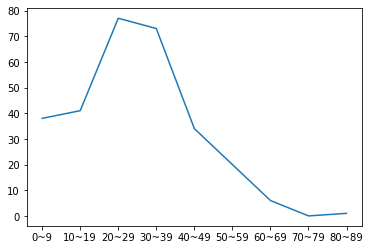

In [11]:
plt.plot(divide_ten.index, divide_ten.Survived)

In [12]:
# Which port of embarkation had most of the survivors? And which less?

In [13]:
embark = train.groupby(train.Embarked).sum()
embark

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,74820,93,317,4005.92,65,61,10072.2962
Q,32178,30,224,786.50,33,13,1022.2543
S,289496,217,1514,16312.75,368,266,17439.3988


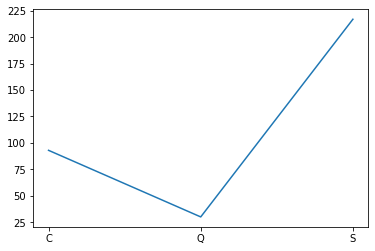

In [14]:
plt.plot(embark.index, embark.Survived)

In [15]:
# Which ticket class had most of the survivors? And which less?

In [16]:
pclass = train.groupby(train.Pclass).sum()

In [17]:
pclass

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,99705,136,7111.42,90,77,18177.4125
2,82056,87,5168.83,74,70,3801.8417
3,215625,119,8924.92,302,193,6714.6951


In [18]:
pclass.Survived

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [19]:
# Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?

In [20]:
sur = train[train['Survived'] == 1]
no_sur = train[train['Survived'] == 0]

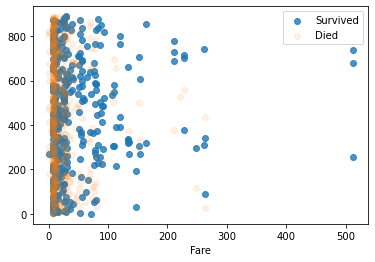

In [21]:
plt.scatter(sur.Fare, sur.index, alpha=0.8, label='Survived')
plt.scatter(no_sur.Fare, no_sur.index, alpha=0.1, label='Died')
plt.xlabel("Fare")
plt.legend()
plt.show()